In [ ]:
import statistics as st                                                   #Summary Statistics for given ungrouped data
import numpy as np
l=[12,11,8,7,6,13,7,7,9,11,18]
l=sorted(l)
print("Summary statistics for population")
print("Mean:",st.mean(l))
print("Median:",st.median(l))
print("Mode:",st.mode(l))
print("Variance:",st.pvariance(l))
print("Standard Deviation:",st.pstdev(l))
print("Skew",3*(st.mean(l)-st.median(l))/st.pstdev(l))
print("30th Percentile:",np.quantile(l,0.3))

Summary statistics for population
Mean: 9.909090909090908
Median: 9
Mode: 7
Variance: 11.537190082644628
Standard Deviation: 3.3966439440489826
Skew 0.8029315913582832
30th Percentile: 7.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


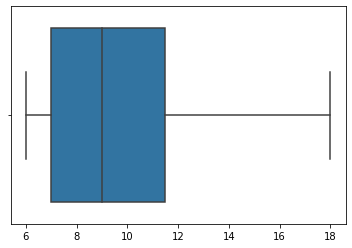

In [ ]:
import matplotlib.pyplot as plt                                     #Boxplot for given data
import seaborn as sb
sb.boxplot(l)
plt.show()

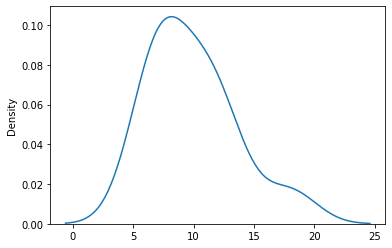

In [ ]:
sb.kdeplot(data=l)                                #Probability Density Curve for given data
plt.show()  

In [ ]:
import pandas as pd                                                     #Producing grouped data
ls=pd.Series(l)                                                         #Output of pd.cut gives an 'Interval' object in the form (x, y). This code processes these intervals in order to
lc=pd.cut(ls,(0,5,10,15,20),['0-5','5-10','10-15','15-20'])             #remove the space before y and brackets(by conversion to string) and returns a list by splitting the class by ',' 
classes=pd.Series(dict(lc.value_counts(sort=False)).keys())             
freq=pd.Series(dict(lc.value_counts(sort=False)).values())
df=pd.DataFrame()
df['classes']=classes
df['frequency']=freq
def f(x):
  x=str(x)
  x=x.lstrip('(').rstrip(']')
  l=x.split(',')
  l.append(l[1].strip())
  l.remove(l[1])
  return l
df['classes']=df['classes'].apply(f)
print(df)

    classes  frequency
0    [0, 5]          0
1   [5, 10]          6
2  [10, 15]          4
3  [15, 20]          1


In [ ]:
def summ(l,n):                                                          #Finding Cumulative Frequency
  sum=0
  for i in range(n+1):
    sum=sum+l[i]
  return sum
cumfreq=[]
cumfreq.append(df['frequency'][0])
for i in range(1,len(df['frequency'])):
  cumfreq.append(summ(df['frequency'],i))
df['CF']=pd.Series(cumfreq)
print(df)

    classes  frequency  CF
0    [0, 5]          0   0
1   [5, 10]          6   6
2  [10, 15]          4  10
3  [15, 20]          1  11


In [ ]:
mdpts=[]                                                              #Finding mean for grouped data
for i in df['classes']:
  x=(int(i[0])+int(i[1]))/2
  mdpts.append(x)
Mean=np.sum(np.array(mdpts)*np.array(df['frequency']))/11
print(Mean)

10.227272727272727


In [ ]:
mnclass=df[df['CF']>(df['frequency'].sum())/2].iloc[0]                #Finding Median for grouped data
Med=int(mnclass['classes'][0])+(((df['frequency'].sum()/2)-df[df['CF']<=(df['frequency'].sum())/2].iloc[-1]['CF'])*5)/mnclass['frequency']
print(Med)

9.583333333333332


In [ ]:
mdclass=df[df['frequency']==df['frequency'].max()].iloc[0]            #Finding mode for grouped data
pos=list(df['frequency']).index(int((df[df['frequency']==df['frequency'].max()]['frequency'])))
d1=df['frequency'].iloc[pos]-df['frequency'].iloc[pos-1]
d2=df['frequency'].iloc[pos]-df['frequency'].iloc[pos+1]
Mode=int(mdclass['classes'][0])+(d1*5)/(d1+d2)
print(Mode)

8.75


In [ ]:
df1=pd.read_csv('StudentsPerformance.csv')                        #That was univariate analysis. Now moving to bivariate analysis
df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


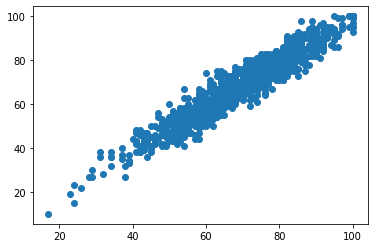

In [ ]:
plt.scatter(df1['reading score'],df1['writing score'])          #Visualizing correlation between two random variables
plt.show()

In [ ]:
import scipy.stats as sc
rho=sc.pearsonr(df1['reading score'],df1['writing score'])[0]   #Finding correlation coeffiecient and cpvariance
covr=rho*st.pstdev(df1['reading score'])*st.pstdev(df1['writing score'])
print("Covariance:",covr)
print("Correlation Coefficient:",rho)

Covariance: 211.57487400000002
Correlation Coefficient: 0.9545980771462479
